In [3]:
import numpy as np


In [6]:
- (9/20 * np.log2(9/20) + 11/20 * np.log2(11/20))

0.9927744539878083

Энтропия - мера хаоса

Прирост информации возникает при уменьшении энтропии

Алгоритм максимизирует прирост информации - для того, чтобы понять, как делить выборку

Листы дерева - это конечные узлы


In [7]:
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline


In [8]:
# первый класс
np.seed = 7 # идентификатор последоавтельности рандомизаци 
train_data = np.random.normal(size=(100, 2))
train_labels = np.zeros(100)

# второй класс
train_data = np.r_[train_data, np.random.normal(size=(100, 2), loc=2)]
train_labels = np.r_[train_labels, np.ones(100)]

In [9]:
train_data

array([[-1.26742569e+00, -3.99298594e-01],
       [ 4.94912783e-01, -7.55696956e-01],
       [ 1.28596528e-01,  1.55519871e-01],
       [ 1.88260855e-01,  9.25149730e-01],
       [ 9.39548603e-01,  8.50672528e-01],
       [-3.07807405e-01, -2.36044079e-01],
       [-6.38779170e-01,  2.04001736e-01],
       [ 2.31023699e+00,  1.47783381e-01],
       [-1.80981527e-01,  1.00440071e+00],
       [ 8.98081873e-01, -5.57786542e-01],
       [ 8.28646769e-01,  2.18027413e+00],
       [-1.22133092e+00,  1.59630726e+00],
       [-1.22792784e+00,  3.10757359e-01],
       [ 1.18708414e+00, -1.49922395e+00],
       [-1.27839337e+00, -7.68701382e-01],
       [-3.17482310e-01, -7.54964034e-01],
       [ 1.28966014e-01,  2.66740789e-01],
       [-1.55788060e+00,  7.58977935e-01],
       [-6.37087813e-01, -7.04624800e-01],
       [ 1.00700137e+00,  6.35519628e-01],
       [-1.12218473e-01, -4.54942909e-02],
       [-7.87100587e-01, -8.79239140e-01],
       [-1.38579469e+00, -6.70593154e-01],
       [ 1.

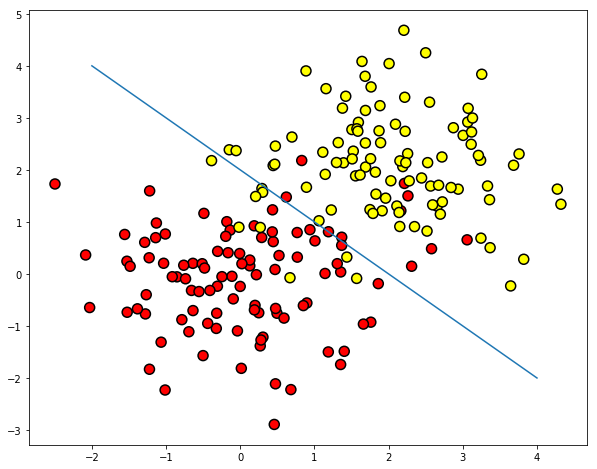

In [11]:
plt.rcParams['figure.figsize'] = (10,8)
plt.scatter(train_data[:, 0], train_data[:, 1], c=train_labels, s=100,
           cmap ='autumn', edgecolors='black', linewidth=1.5)
plt.plot(range(-2,5), range(4, -3, -1))

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=17)

In [14]:
clf_tree.fit(train_data, train_labels)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best')

In [16]:
def get_grid(data):
        x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1 
        y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
        return np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01)) 

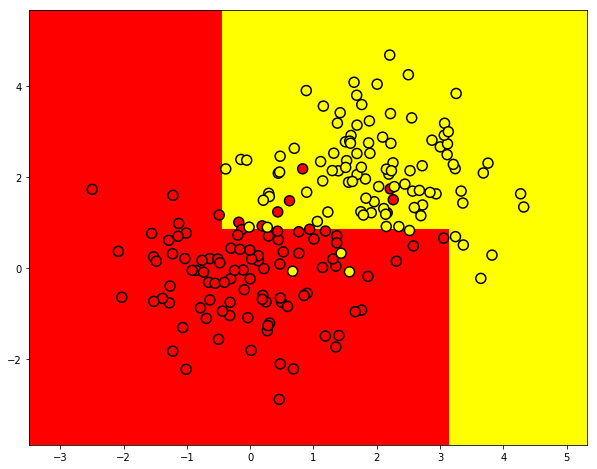

In [24]:
## точки - это train , а сетка - это как бы тест

xx, yy = get_grid(train_data)
predicted = clf_tree.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
plt.pcolormesh(xx, yy, predicted, cmap = 'autumn')
plt.scatter(train_data[: , 0], train_data[:, 1], c=train_labels, s=100,
           cmap='autumn', edgecolors = 'black', linewidth=1.5)


In [20]:
xx

array([[-3.49756972, -3.48756972, -3.47756972, ...,  5.30243028,
         5.31243028,  5.32243028],
       [-3.49756972, -3.48756972, -3.47756972, ...,  5.30243028,
         5.31243028,  5.32243028],
       [-3.49756972, -3.48756972, -3.47756972, ...,  5.30243028,
         5.31243028,  5.32243028],
       ...,
       [-3.49756972, -3.48756972, -3.47756972, ...,  5.30243028,
         5.31243028,  5.32243028],
       [-3.49756972, -3.48756972, -3.47756972, ...,  5.30243028,
         5.31243028,  5.32243028],
       [-3.49756972, -3.48756972, -3.47756972, ...,  5.30243028,
         5.31243028,  5.32243028]])

In [21]:
import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image
from sklearn.externals.six import StringIO

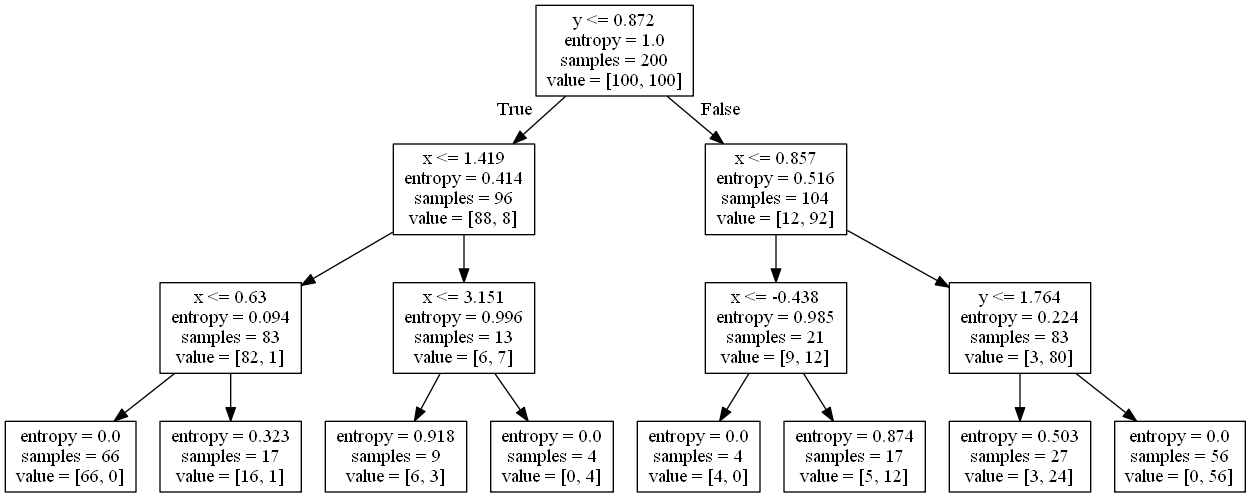

In [23]:


                
dot_data = StringIO()
export_graphviz(clf_tree, out_file=dot_data, feature_names=['x','y'])
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())